Spotify Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist          

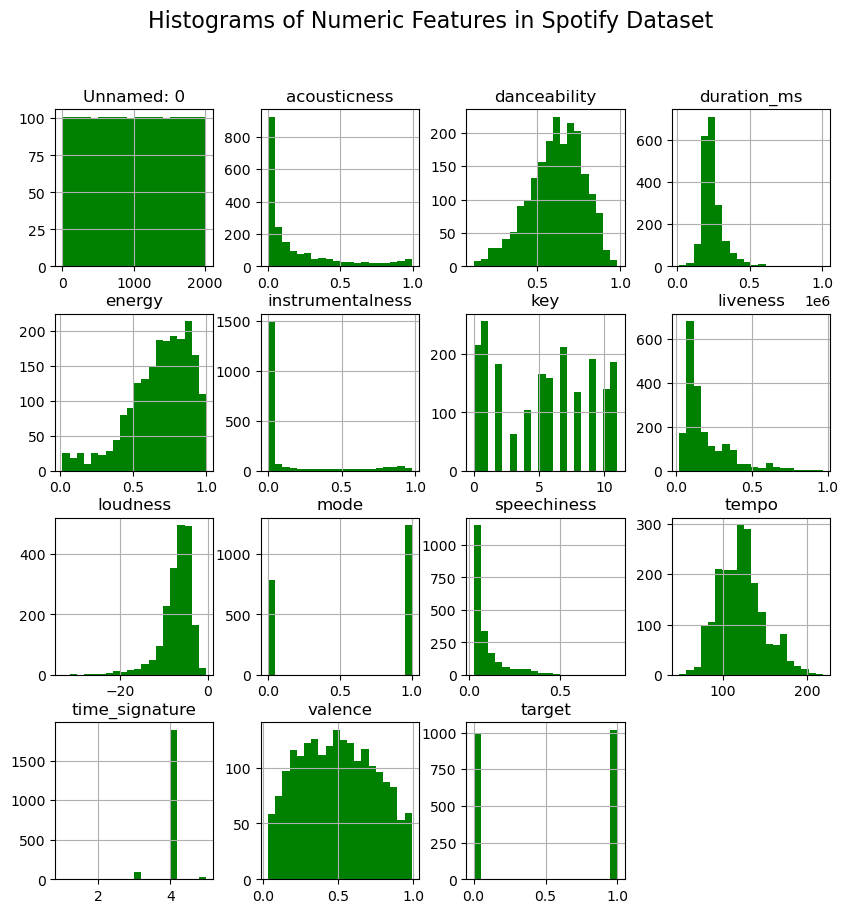

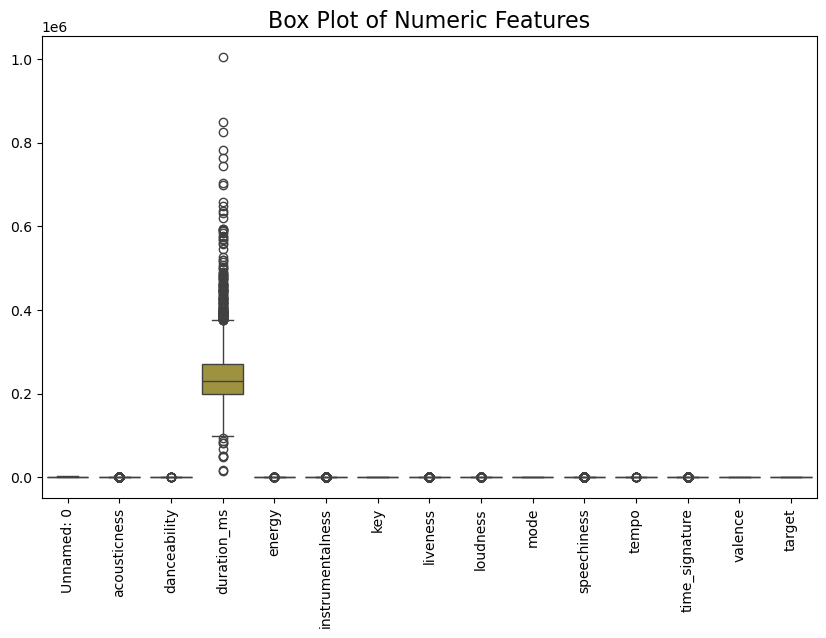


Data types of Spotify dataset columns:
Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object


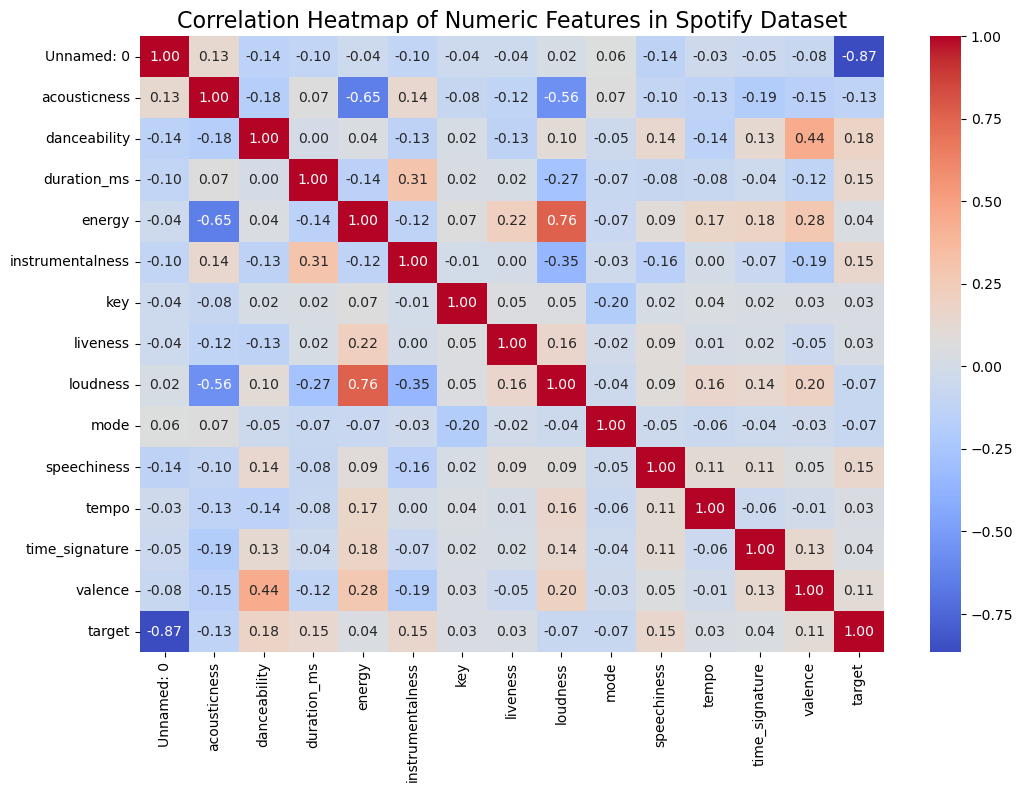

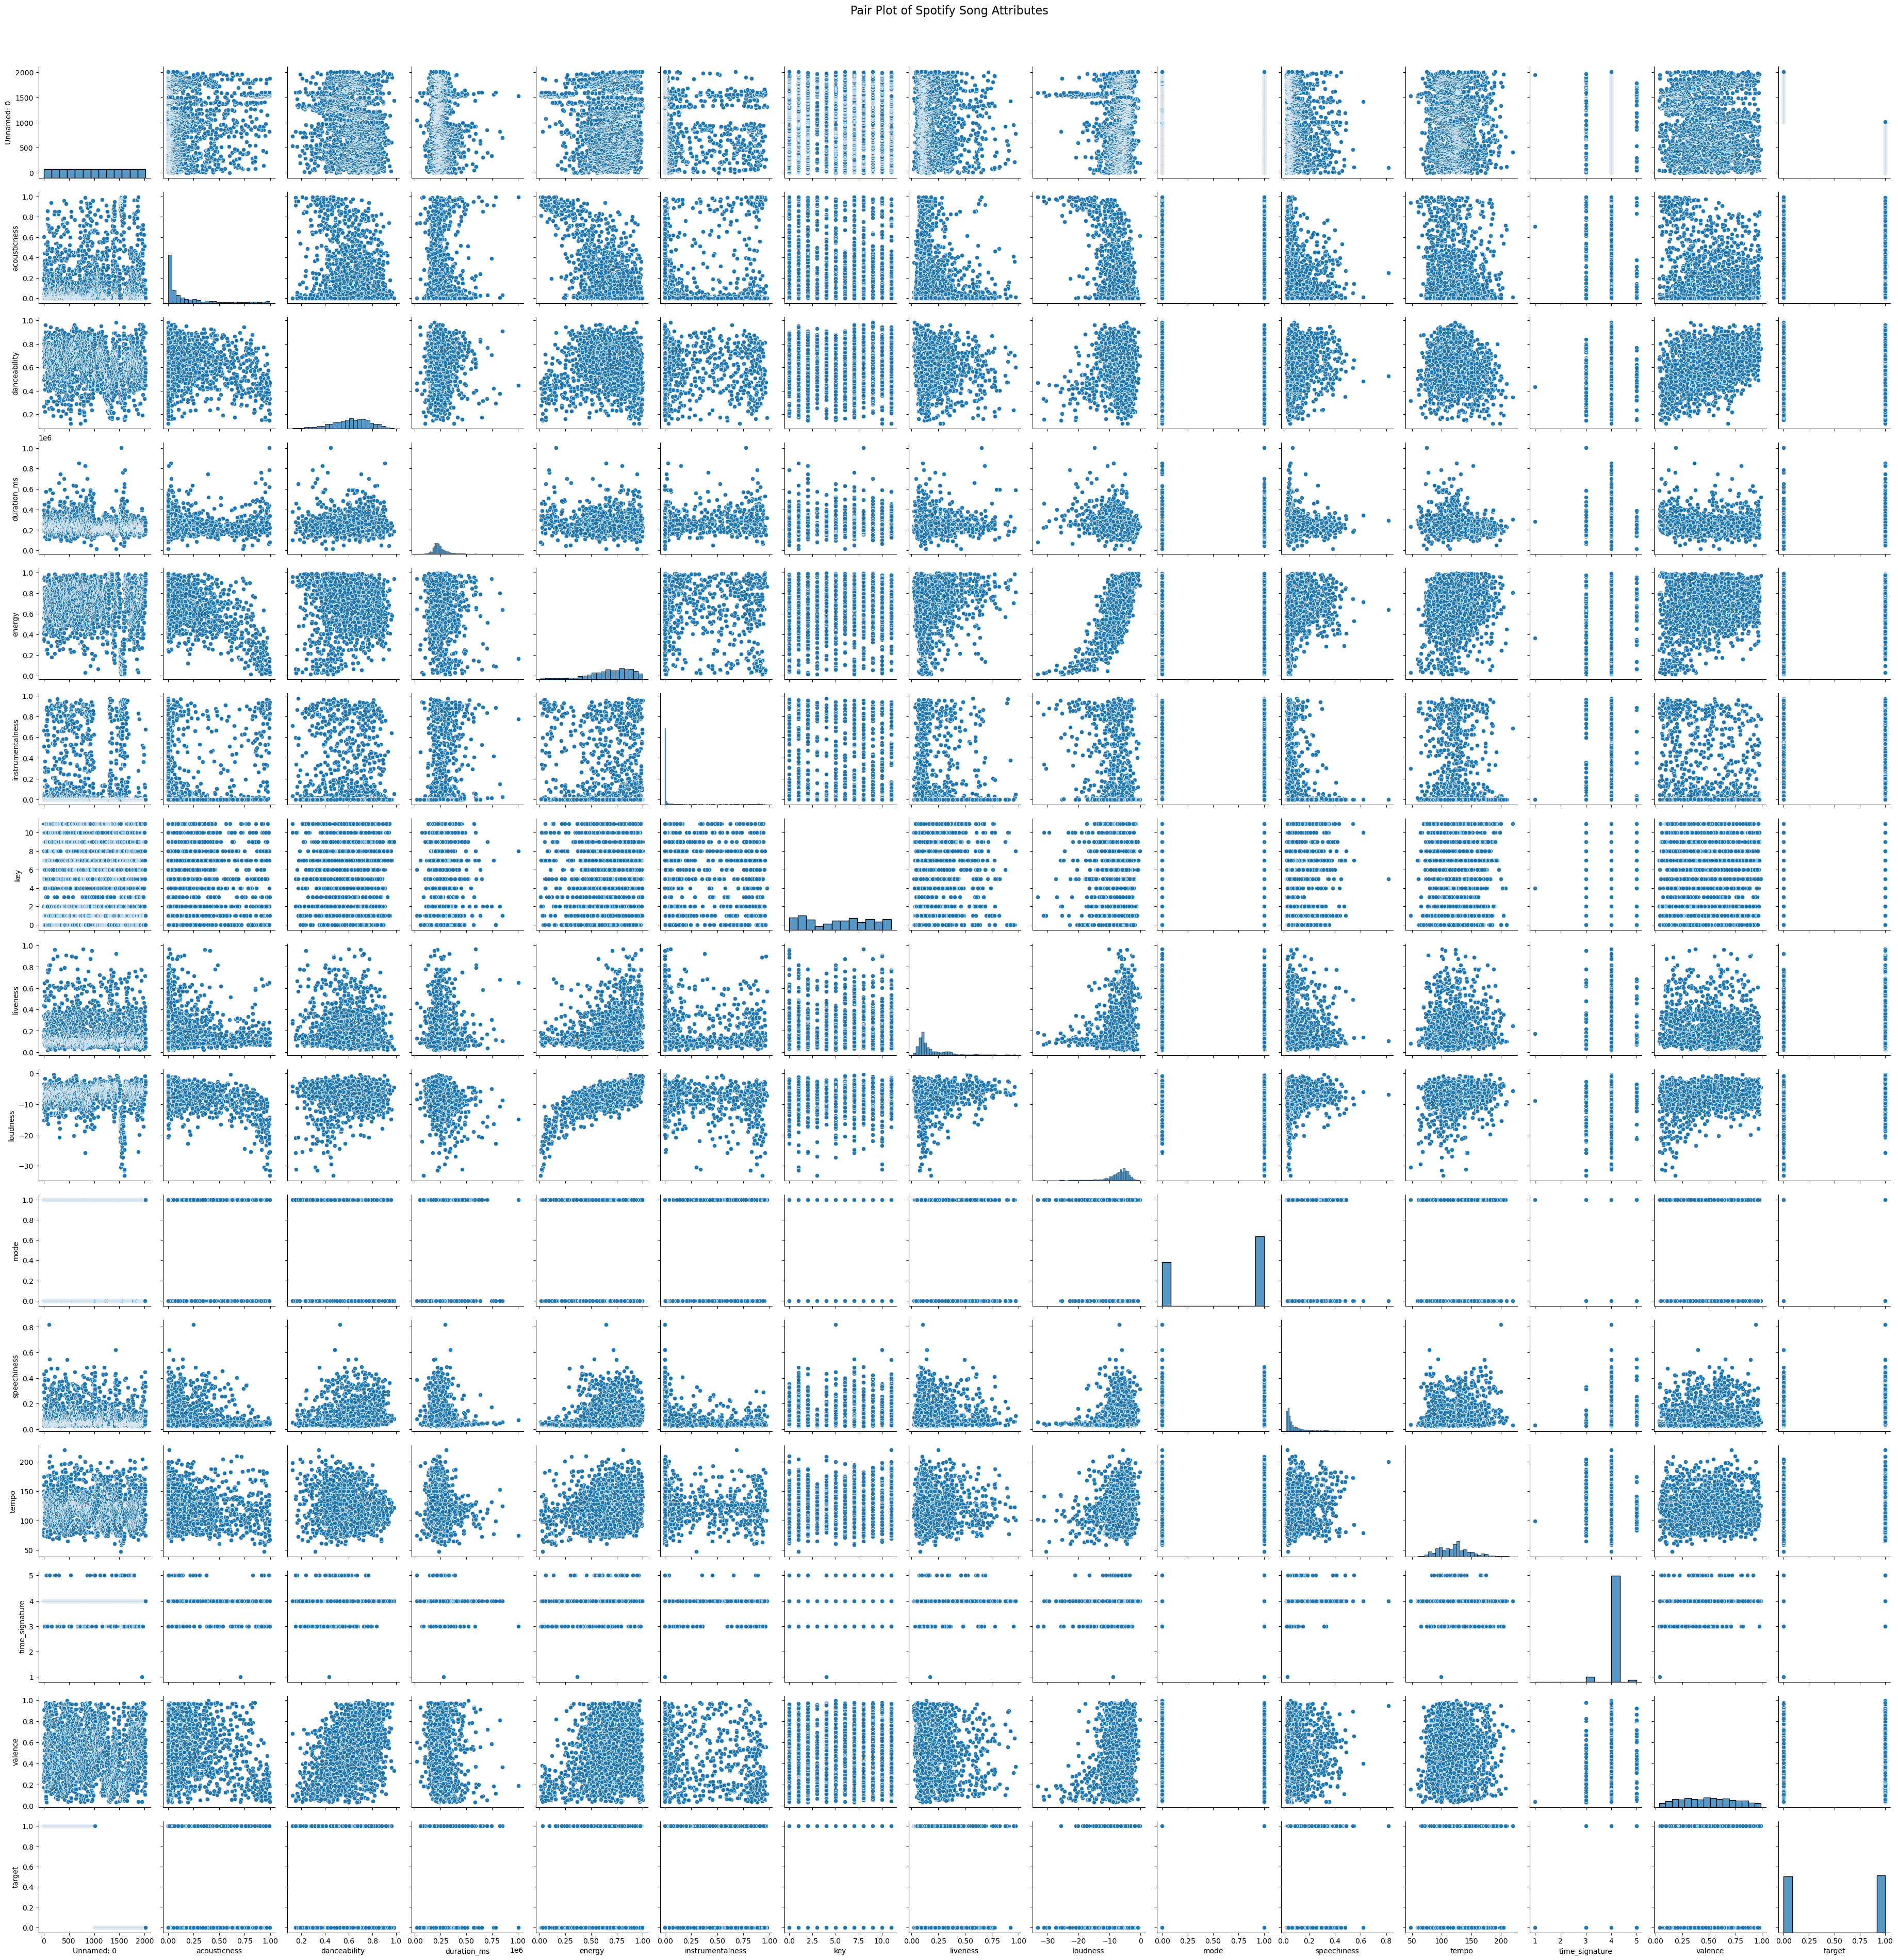

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
spotify_file_path = r"C:\Users\Dhanush\Downloads\Spotify data.csv"
df_spotify = pd.read_csv(spotify_file_path)

# Overview of the dataset
print("Spotify Dataset Overview:")
print(df_spotify.info())  # Provides summary of the dataset including missing values and data types
print("\nFirst 5 rows of the Spotify dataset:")
print(df_spotify.head())  # Display first 5 rows

# Summary statistics
print("\nSummary statistics:")
print(df_spotify.describe())  # Provides summary statistics of numeric columns

# Objective: Understand the key features that influence song popularity

# 1. Check for missing values
print("\nChecking for missing values:")
print(df_spotify.isnull().sum())  # Summarize missing values per column

# 2. Univariate Analysis - Distributions of Numeric Columns
# Histogram for numeric features like tempo, loudness, duration, etc.
df_spotify.hist(bins=20, figsize=(10, 10), color='green')
plt.suptitle("Histograms of Numeric Features in Spotify Dataset", fontsize=16)
plt.show()

# Box plot for visualizing outliers in numeric columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spotify.select_dtypes(include=[np.number]))  # Only numeric columns for boxplot
plt.title("Box Plot of Numeric Features", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# 3. Bivariate Analysis - Relationships between Features
# Check the data types of the columns
print("\nData types of Spotify dataset columns:")
print(df_spotify.dtypes)

# Select only numeric columns for the correlation matrix
df_spotify_numeric = df_spotify.select_dtypes(include=[np.number])

# Now compute the correlation matrix
corr_matrix_spotify = df_spotify_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_spotify, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features in Spotify Dataset", fontsize=16)
plt.show()

# Scatter plot: Tempo vs Popularity (if 'popularity' column exists)
if 'tempo' in df_spotify.columns and 'popularity' in df_spotify.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='tempo', y='popularity', data=df_spotify, color='purple')
    plt.title("Tempo vs Popularity in Spotify Songs", fontsize=16)
    plt.show()

# Pair plot for all numeric variables
sns.pairplot(df_spotify_numeric)
plt.suptitle("Pair Plot of Spotify Song Attributes", fontsize=16, y=1.02)
plt.show()

# 4. Multivariate Analysis: Feature Importance
# Identifying important features using correlation with popularity (if it exists)
if 'popularity' in df_spotify.columns:
    corr_with_popularity = df_spotify.corr()['popularity'].sort_values(ascending=False)
    print("\nCorrelation of Features with Song Popularity:")
    print(corr_with_popularity)

# 5. Insights and Summary
# Insights can be discussed in this section of your report.
# Example:
# - Higher tempo and danceability are positively correlated with song popularity.
# - Loudness and energy show moderate positive correlations with popularity.
